# Prediction of Credit Card Approval

# Introduction
The entire banking sector relies on the practice of borrowing and lending. 
Banks borrow money from depositors and other sources and lend that money to 
borrowers who need it.

During the lending process, banks carry out credit analysis to evaluate the 
creditworthiness of a borrower which helps in risk assessment and getting an 
overall view of the applicant's financial standing by analyzing the credit history. 
It also helps in maintaining profitability, minimizing the risk of fraudulent activities, and enhancing the customer experience.

# Importance in today's world:
With the increasing number of credit card applications, banks, and other 
financial institutions face the challenge of efficiently processing these 
applications while ensuring that they only approve credit cards for qualifiedapplicants.

This project is aimed to develop an efficient predictive model that can help 
banks and financial institutions streamline their credit card approval process, 
mitigating the risk of fraud, and ultimately increase profitability while ensuring fair and responsible lending practices.

# Overview of the dataset
We will work on Credit_card.csv dataset which contains 18 features and 
1548 observations. Each observation contains personal, financial, and 
employment data of an individual. The target variable is binary and is 
stored in Credit_card_label.csv file.

Out of 18 features 6 are numerical and the rest are categorical. We will 
explore the dataset further in our analysis.

In target variable, the rejected applications are in extreme minority which 
indicates class imbalance, and the prediction of these minority classes is one 
of the main challenges because Machine Learning algorithms usually work best 
when the different classes contained in the dataset are more or less equally 
present. If there are few cases of rejected applications, then there's little 
data to learn how to identify them.



Here two dataframes are there one 1)Feature details
2)label:
    0: credit approved
    1:Rejected

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit=pd.read_csv('Credit_card.csv') # importing the dataset

In [3]:
credit.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
label=pd.read_csv('Credit_card_label.csv')

In [5]:
label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [6]:
# merging the datasets
credit_card=credit.merge(label,how='inner',on='Ind_ID')

In [7]:
df1=credit_card.copy(deep=True)

In [8]:
df1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
df1.shape

(1548, 19)

In [10]:
no_null_values=pd.DataFrame(df1.isnull().sum(),columns=['Null_values'])
per_null_values=pd.DataFrame(df1.isnull().mean()*100,columns=['per_null_values'])
null_values=pd.concat([no_null_values,per_null_values],axis=1).sort_values(by='per_null_values',ascending=False)

In [11]:
null_values

,Null_values,per_null_values
Type_Occupation,488,31.524548
Annual_income,23,1.485788
Birthday_count,22,1.421189
GENDER,7,0.452196
Ind_ID,0,0.000000
Employed_days,0,0.000000
Family_Members,0,0.000000
EMAIL_ID,0,0.000000
Phone,0,0.000000
Work_Phone,0,0.000000


In [12]:
df1.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [13]:
# Checking unique values in each column in detail
for i in df1.columns:
    print(f'{i}: {df1[i].unique()}','\n')

Ind_ID: [5008827 5009744 5009746 ... 5115992 5118219 5053790] 

GENDER: ['M' 'F' nan] 

Car_Owner: ['Y' 'N'] 

Propert_Owner: ['Y' 'N'] 

CHILDREN: [ 0  1  2  4  3 14] 

Annual_income: [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37

In [14]:
# checking for duplicates
df1.duplicated().sum()

0

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

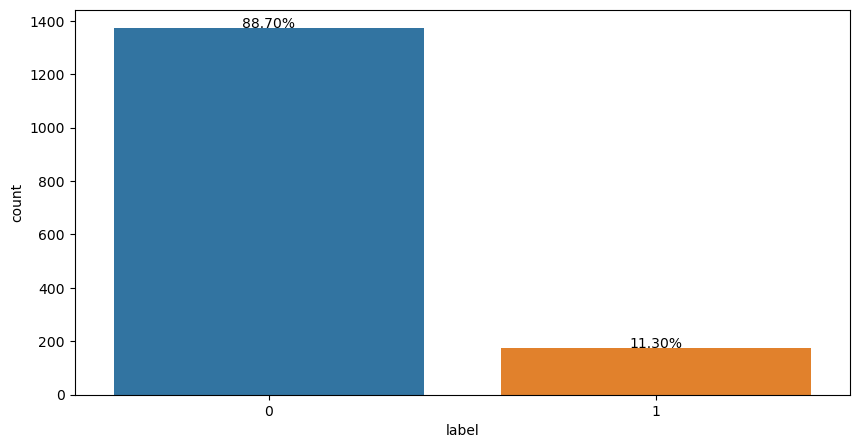

In [16]:
# count of occurances of creditcard approvals and rejections
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df1['label'])
total = float(len(df1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{height/total:.2%}',
            ha="center")
plt.show()

Here, we can clearly observe imbalance in the data where maximum number 
applicants are of whose application is approved. This need to corrected using
sampling techniques before feeding into predictive models.

# EDA and Data Preprocessing

In [17]:
df1.columns=df1.columns.str.lower()
df1.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [18]:
# Removing Unnecessary Columns
df1.drop('mobile_phone',axis=1,inplace=True) # because it has one value(1)

In [19]:
#setting index
df1.set_index('ind_id',drop=True,inplace=True)

In [20]:
# Converting the datatypes of categorical columns to 'category' for performance optimization
cols = ['gender','car_owner','propert_owner','type_income','education','marital_status','housing_type',
        'work_phone','phone','email_id', 'type_occupation', 'label']
df1[cols] = df1[cols].astype('category')
df1.dtypes

gender             category
car_owner          category
propert_owner      category
children              int64
annual_income       float64
type_income        category
education          category
marital_status     category
housing_type       category
birthday_count      float64
employed_days         int64
work_phone         category
phone              category
email_id           category
type_occupation    category
family_members        int64
label              category
dtype: object

<Axes: >

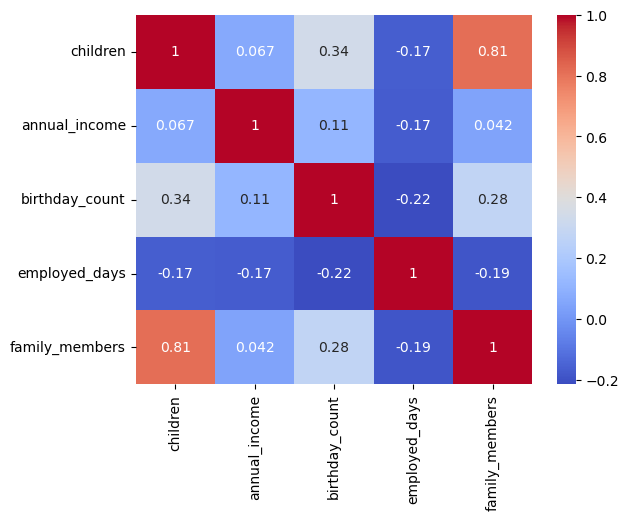

In [21]:
# Correlation matrix for Spearman's Rank Correlation
sns.heatmap(df1.corr(method = 'spearman'), annot = True, cmap = 'coolwarm')

In [22]:
#univariate analysis

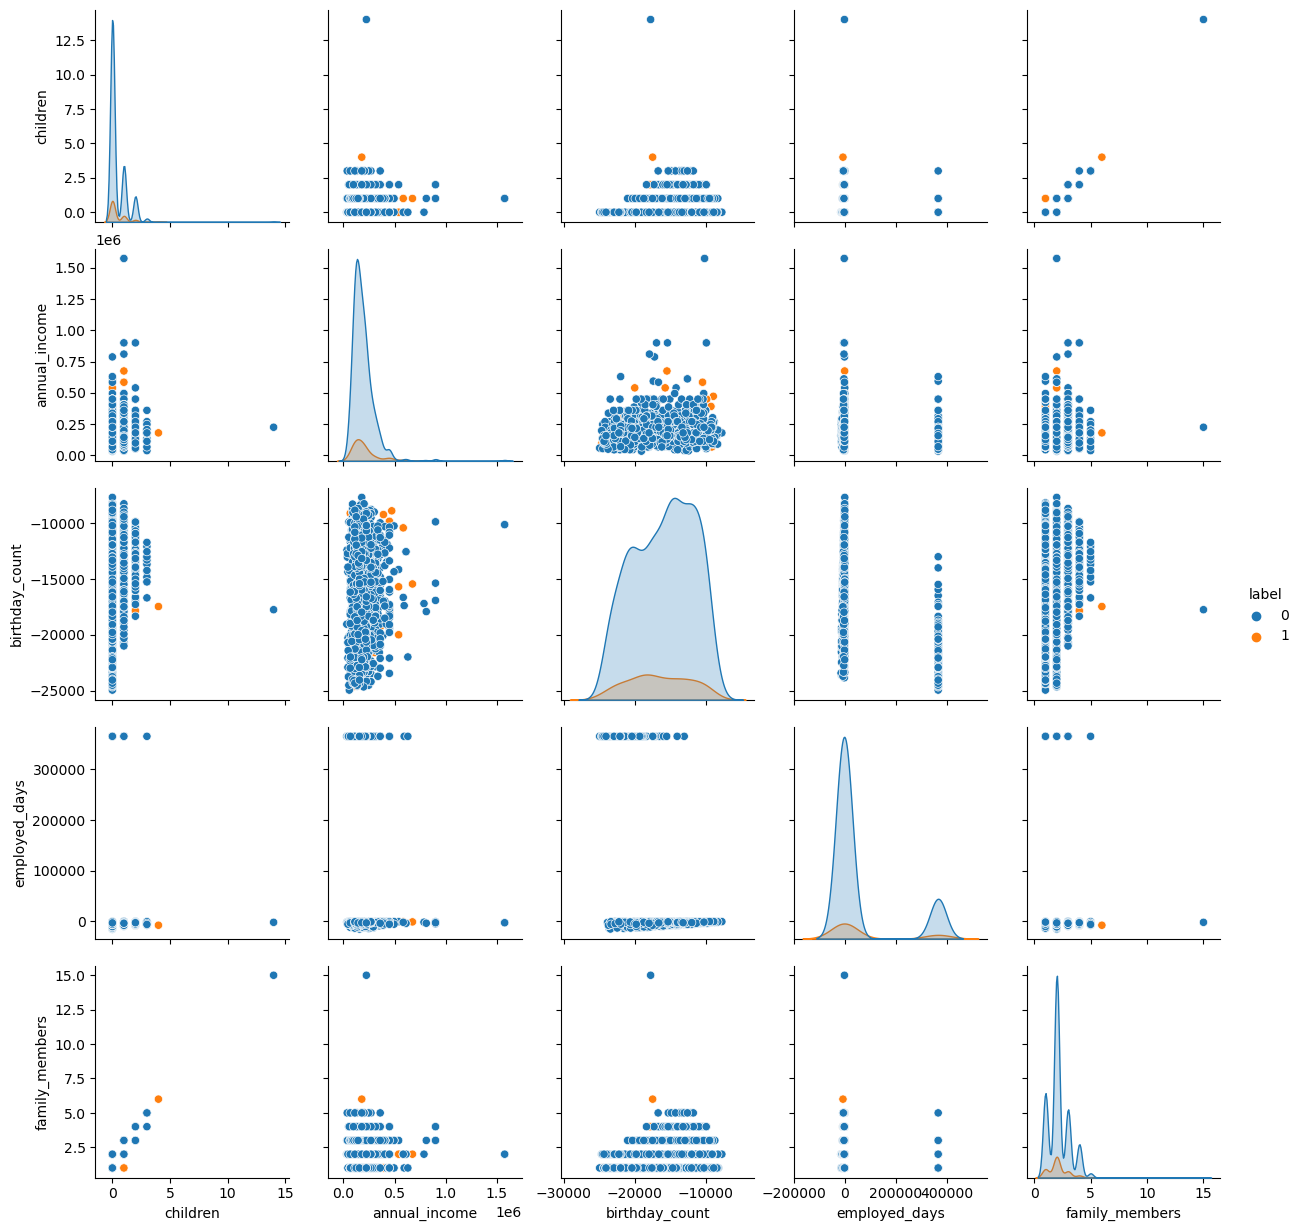

In [23]:
#Overall pattern of data
sns.pairplot(df1, diag_kind = 'kde', hue = 'label')

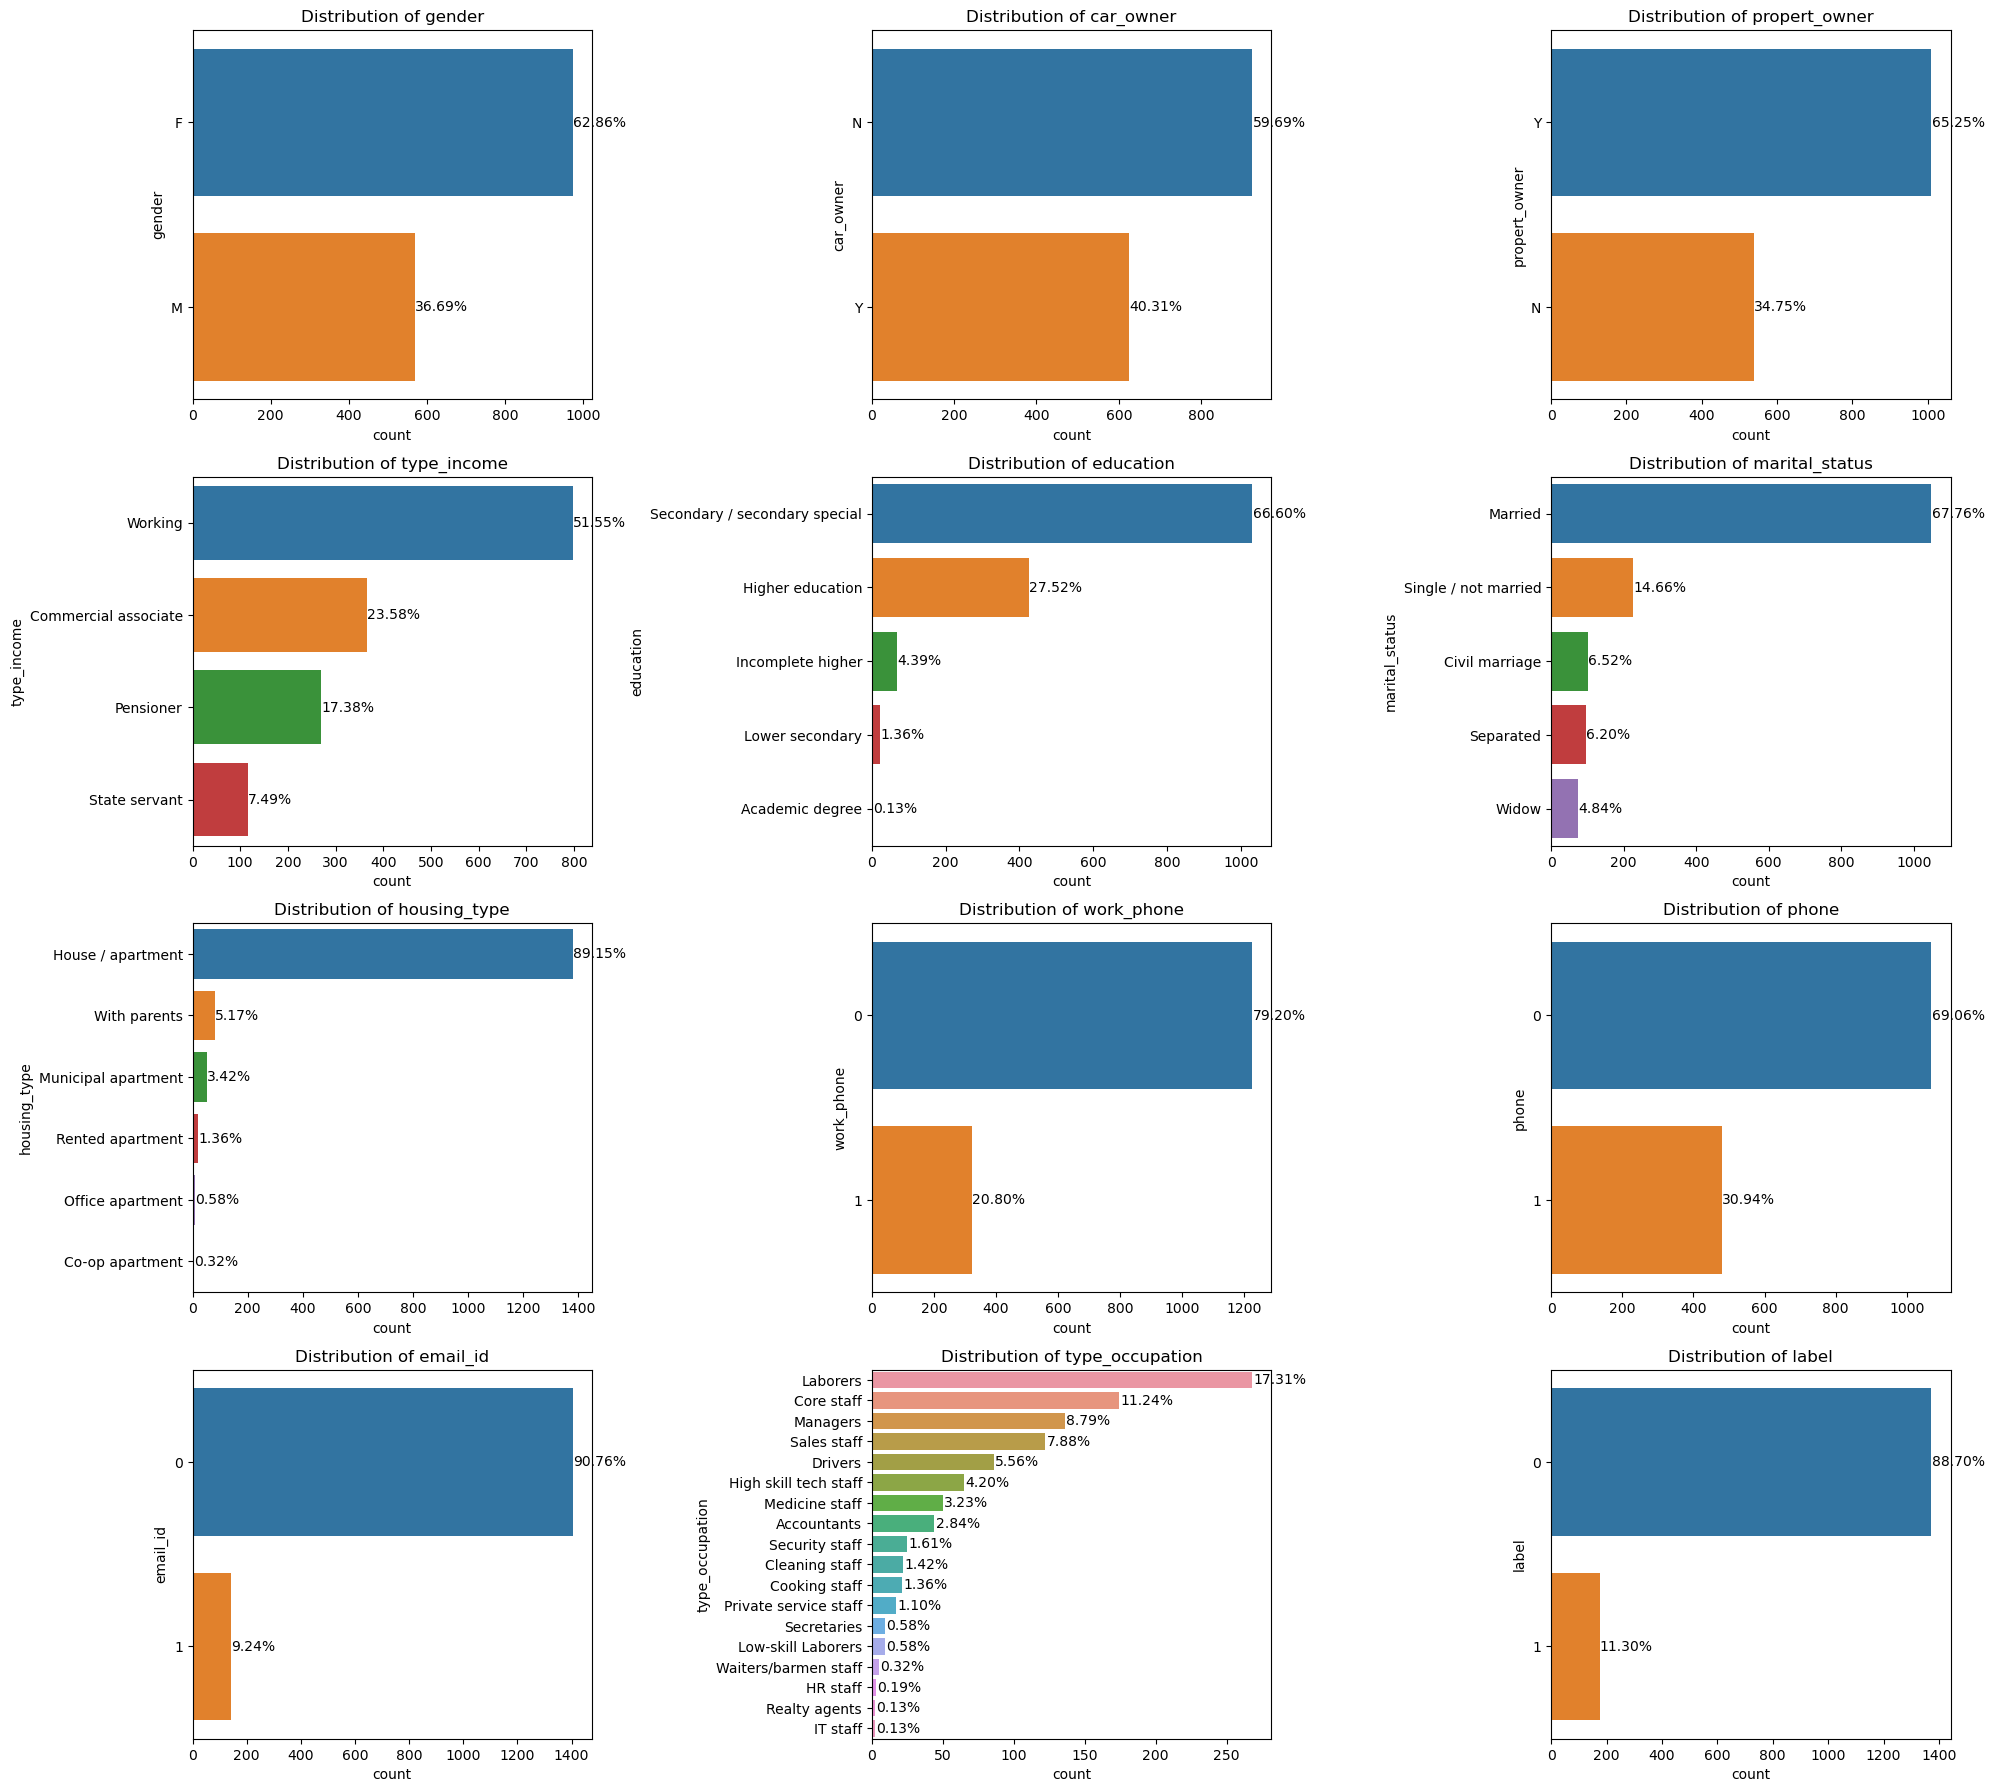

In [24]:
# Analysis of categorical data
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a larger size
fig, axes = plt.subplots(4, 3, figsize=(20, 18))

# Flatten the grid into a 1D array of axes
axes = axes.flatten()

# Initialize a counter for the subplot index
subplot_index = 0

# Loop through each column in the DataFrame and analyze its data type
for column_name, data_type in df1.dtypes.items():
    # Check if the data type is 'category'
    if data_type == 'category':
        # Create a count plot (bar chart) for the current column
        ax = sns.countplot(y=df1[column_name], ax=axes[subplot_index], order=df1[column_name].value_counts().index)
        
        # Increment the subplot index
        subplot_index += 1
        
        # Set the x-axis labels to make them readable
        ax.set_xticklabels(ax.get_xticklabels())
        
        # Set a title for the chart indicating the distribution of the current column
        ax.set_title(f"Distribution of {column_name}")
        
        # Add percentage labels on top of the bars to show the proportion
        for bar in ax.patches:
            percentage = '{:.2f}%'.format(100 * bar.get_width() / len(df1))
            x = bar.get_y() + bar.get_height() / 2
            y = bar.get_width() + 1
            ax.annotate(percentage, (y, x), va='center')
    else:
        pass

# Adjust the layout of the subplots for better spacing
fig.tight_layout(w_pad=0.5,pad=1)


# Display the charts
plt.show()


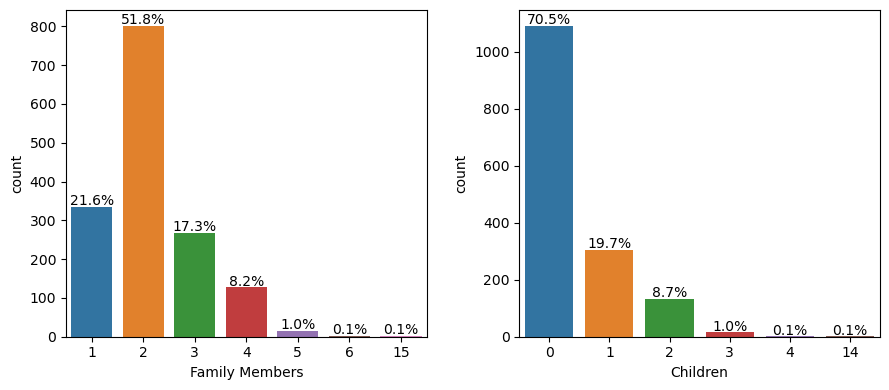

In [25]:
# Discrete numerical data

# Setting the figure size
plt.figure(figsize = (9,4))

#Plotting graphs in subplots
plt.subplot(121)
ax = sns.countplot(x = df1['family_members'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df1))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Family Members")

plt.subplot(122)
ax = sns.countplot(x = df1['children'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df1))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Children")

plt.tight_layout(w_pad = 2)

In [26]:
#Continuous Numerical Data

In [27]:
# Checking value counts to understand the extreme values
df1['employed_days'].value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: employed_days, Length: 956, dtype: int64

In [28]:
# Replacing extreme values of employed days to 1
df1.loc[df1['employed_days']>0, ['employed_days']] = 1

<Axes: xlabel='employed_days', ylabel='Count'>

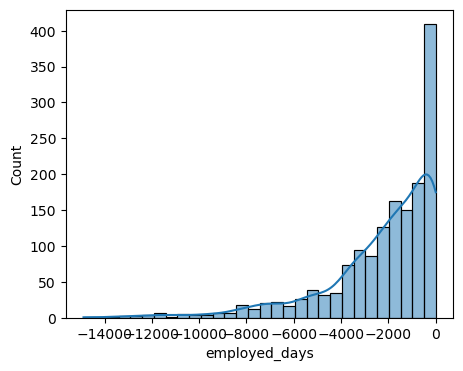

In [29]:
# Checking the distrbution after replacing extreme values
plt.figure(figsize = (5,4))
sns.histplot(x = df1['employed_days'], bins = 30, kde = True)

In [30]:
# still there are some outliers 

In [31]:
#If we look at employed_days and birth_count columns, they are only justifying the Work Experience 
#and Age of an individual respectively. So, let's convert these columns which will help in clear 
#understanding and ease in analysis.

In [32]:
# Creating new columns by extracting data from other feartures
df1['work_experience'] = np.ceil(-df1['employed_days'] / 365.25) #Converting days to years

df1['age'] = np.ceil(-df1['birthday_count'] / 365.25)

# Checking the dataset
df1.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,type_occupation,family_members,label,work_experience,age
ind_id,,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,1,0,0,0,NaN,2,1,-0.0,52.0
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1,2.0,NaN
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0
5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0


In [33]:
#Now, we have actually performed a part feature engineering by extracting data from other features.

#Let's check the difference in skewness of older and new variables

In [34]:
# Skewness values of original columns and Extracted columns

print(f"Skewness of Employed_Days\t:{df1['employed_days'].skew()}")
print(f"Skewness of Work Experience\t:{df1['work_experience'].skew()}")
print(f"Skewness of Birthday_Count\t:{df1['birthday_count'].skew()}")
print(f"Skewness of Age\t\t\t:{df1['age'].skew()}")

Skewness of Employed_Days	:-1.7296023658309658
Skewness of Work Experience	:1.661916218120766
Skewness of Birthday_Count	:-0.17108666821145055
Skewness of Age			:0.17159161366119227


In [35]:
df1.drop(columns = ['birthday_count', 'employed_days'], inplace = True)

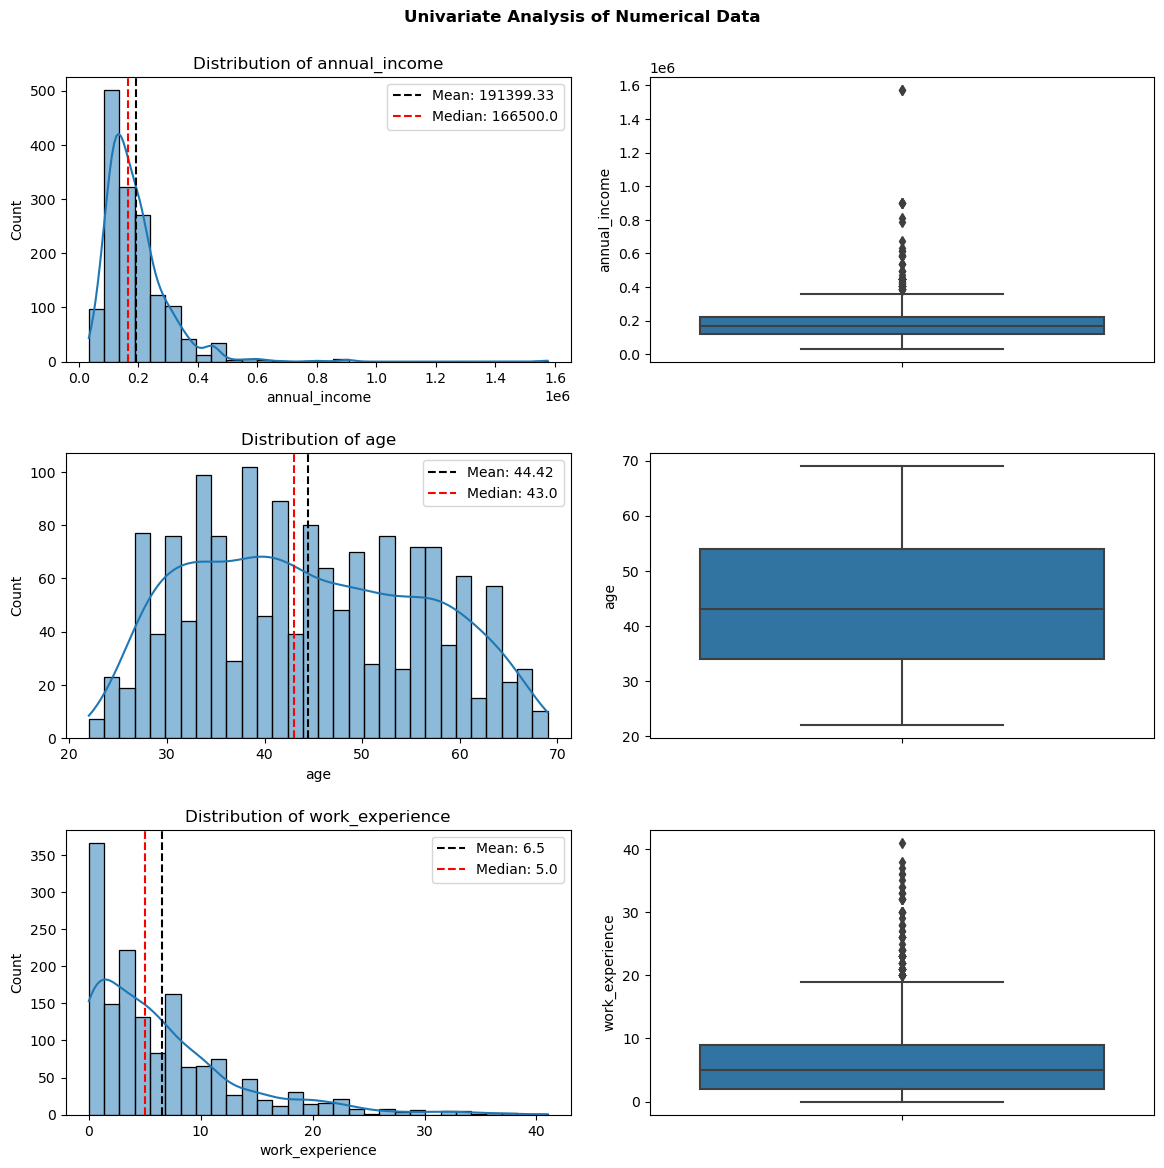

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns you want to analyze
cols = ['annual_income', 'age', 'work_experience']

# Create a figure with larger subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Adjust the figsize as needed
axes = axes.flatten()
j = 0
k = 1

# Loop through the selected columns
for col in cols:
    # Create a histogram plot with KDE (Kernel Density Estimation)
    ax = sns.histplot(x=df1[col], ax=axes[j], kde=True, bins=30)
    
    # Add vertical lines for mean and median
    ax.axvline(x=df1[col].mean(), c='black', ls='--', label=f"Mean: {round(df1[col].mean(), 2)}")
    ax.axvline(x=df1[col].median(), c='r', ls='--', label=f"Median: {round(df1[col].median(), 2)}")
    
    # Set the title and add a legend
    ax.set_title(f"Distribution of {col}")
    ax.legend()
    
    j += 2

# Create box plots for the same columns
for col in cols:
    ax = sns.boxplot(y=df1[col], ax=axes[k])
    k += 2

# Add a main title and adjust subplot layout
plt.suptitle("Univariate Analysis of Numerical Data", fontweight='bold')
plt.tight_layout(w_pad=2, pad=2)
plt.show()


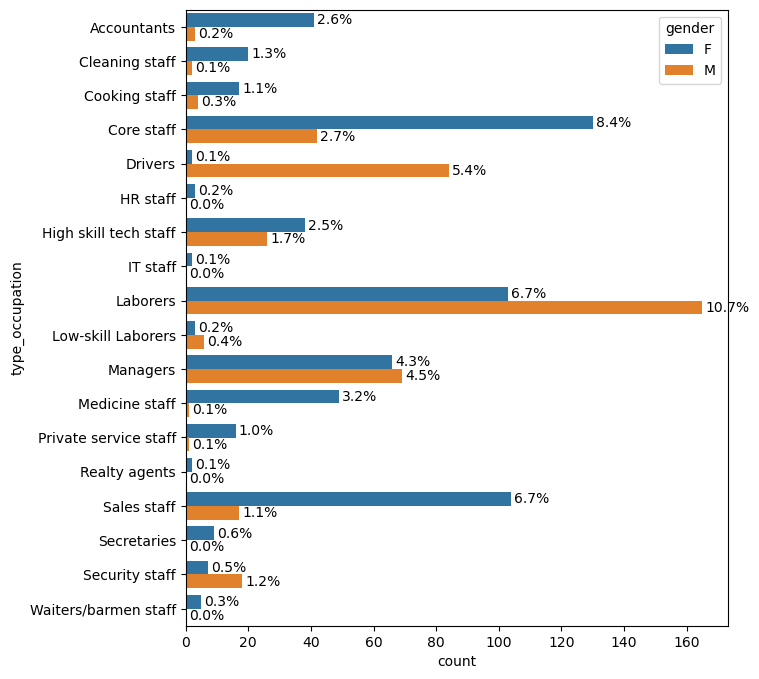

In [37]:
#Bivariate and Multi-variate Analysis
# Checking the distrubution of occupation type by gender

plt.figure(figsize = (7, 8)) # Setting the figure size
ax = sns.countplot(y = df1['type_occupation'], hue = df1['gender'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df1))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')

Laborers, low-skilled laborers, Drivers, Security Staff have higher male involvement compared to females. Also, there are slighly more male managers compared to females.
In core staff jobs, females presence is more than 3 times than as of males and, maximum females are core staff.
There are equal number of females in Sales staff and Laborers.

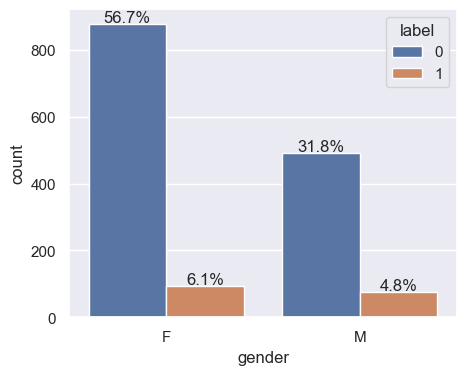

In [38]:
# Checking the distribution of gender by label
sns.set(rc = {'figure.figsize': (5,4)}) # Setting the figure size
ax = sns.countplot(x= df1['gender'], hue = df1['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df1))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

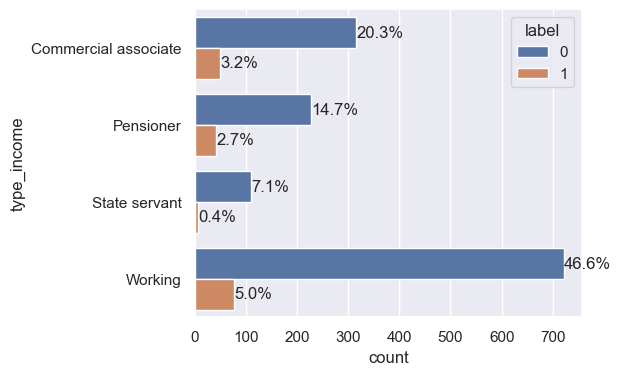

In [39]:
# Checking the distribution of type_income by label
ax = sns.countplot(y= df1['type_income'], hue= df1['label'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df1['type_income']))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')

plt.show()


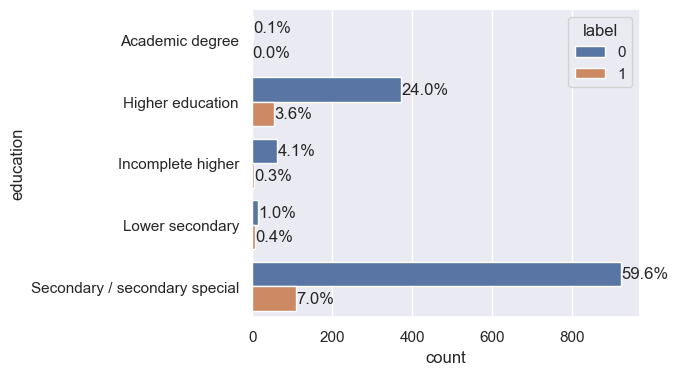

In [40]:
# Checking the distribution of education by label
ax = sns.countplot(y= df1['education'], hue= df1['label'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df1))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')
    
plt.show()

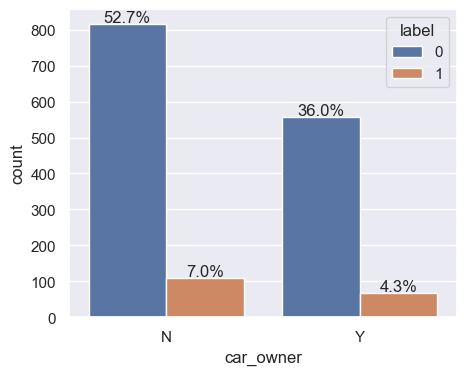

In [41]:
# Checking the distribution of car_owner by label
ax= sns.countplot(x= df1['car_owner'], hue= df1['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df1))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

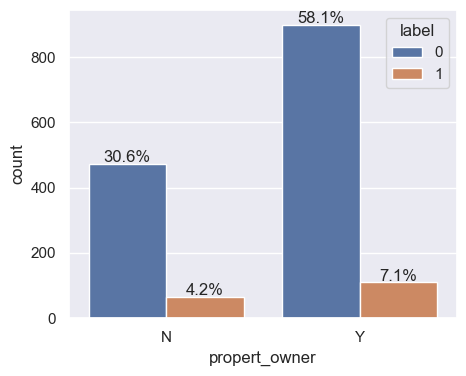

In [42]:
# Checking the distribution of propert_owner by label
ax = sns.countplot(x= df1['propert_owner'], hue= df1['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df1))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

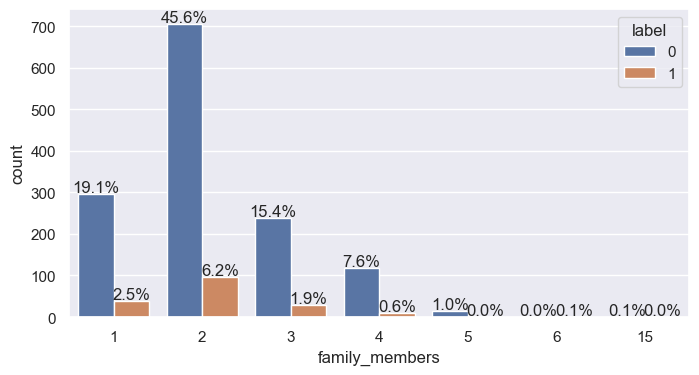

In [43]:
# Checking the distribution of family_members by label
plt.figure(figsize = (8,4)) # Setting the figure size
ax= sns.countplot(x= df1['family_members'], hue= df1['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df1))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

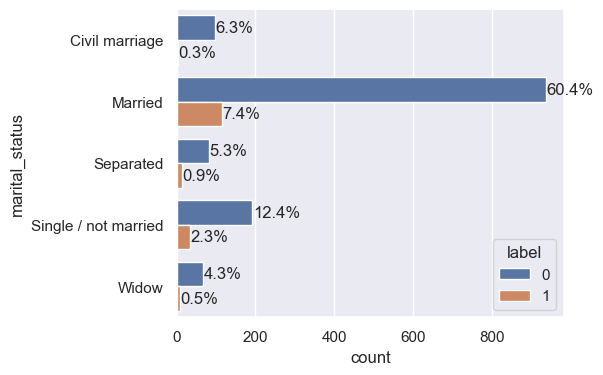

In [44]:
# Checking the distribution of marital_status by label
ax = sns.countplot(y= df1['marital_status'], hue= df1['label'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df1))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')
    
plt.show()

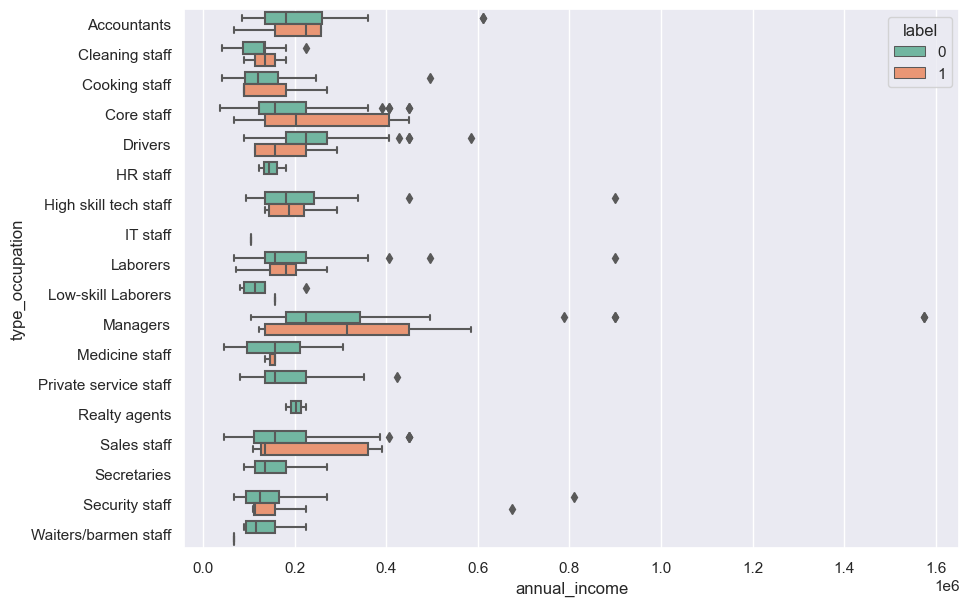

In [45]:
# Comparison of annual income by occupation type for each label
plt.figure(figsize = (10,7))
sns.boxplot(x= df1['annual_income'], y= df1['type_occupation'], hue = df1['label'], palette = 'Set2')
plt.show()

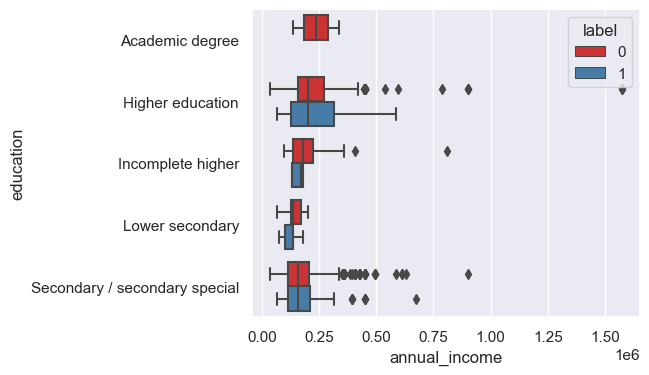

In [46]:
# Distribution of annual income by education for each label
sns.boxplot(x= df1['annual_income'], y= df1['education'], hue = df1['label'], palette = 'Set1')
plt.show()

In [47]:
#Handling Missing Values

In [48]:
# Percentage of missing values
df1.isnull().mean()*100

gender              0.452196
car_owner           0.000000
propert_owner       0.000000
children            0.000000
annual_income       1.485788
type_income         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
work_phone          0.000000
phone               0.000000
email_id            0.000000
type_occupation    31.524548
family_members      0.000000
label               0.000000
work_experience     0.000000
age                 1.421189
dtype: float64

<Axes: >

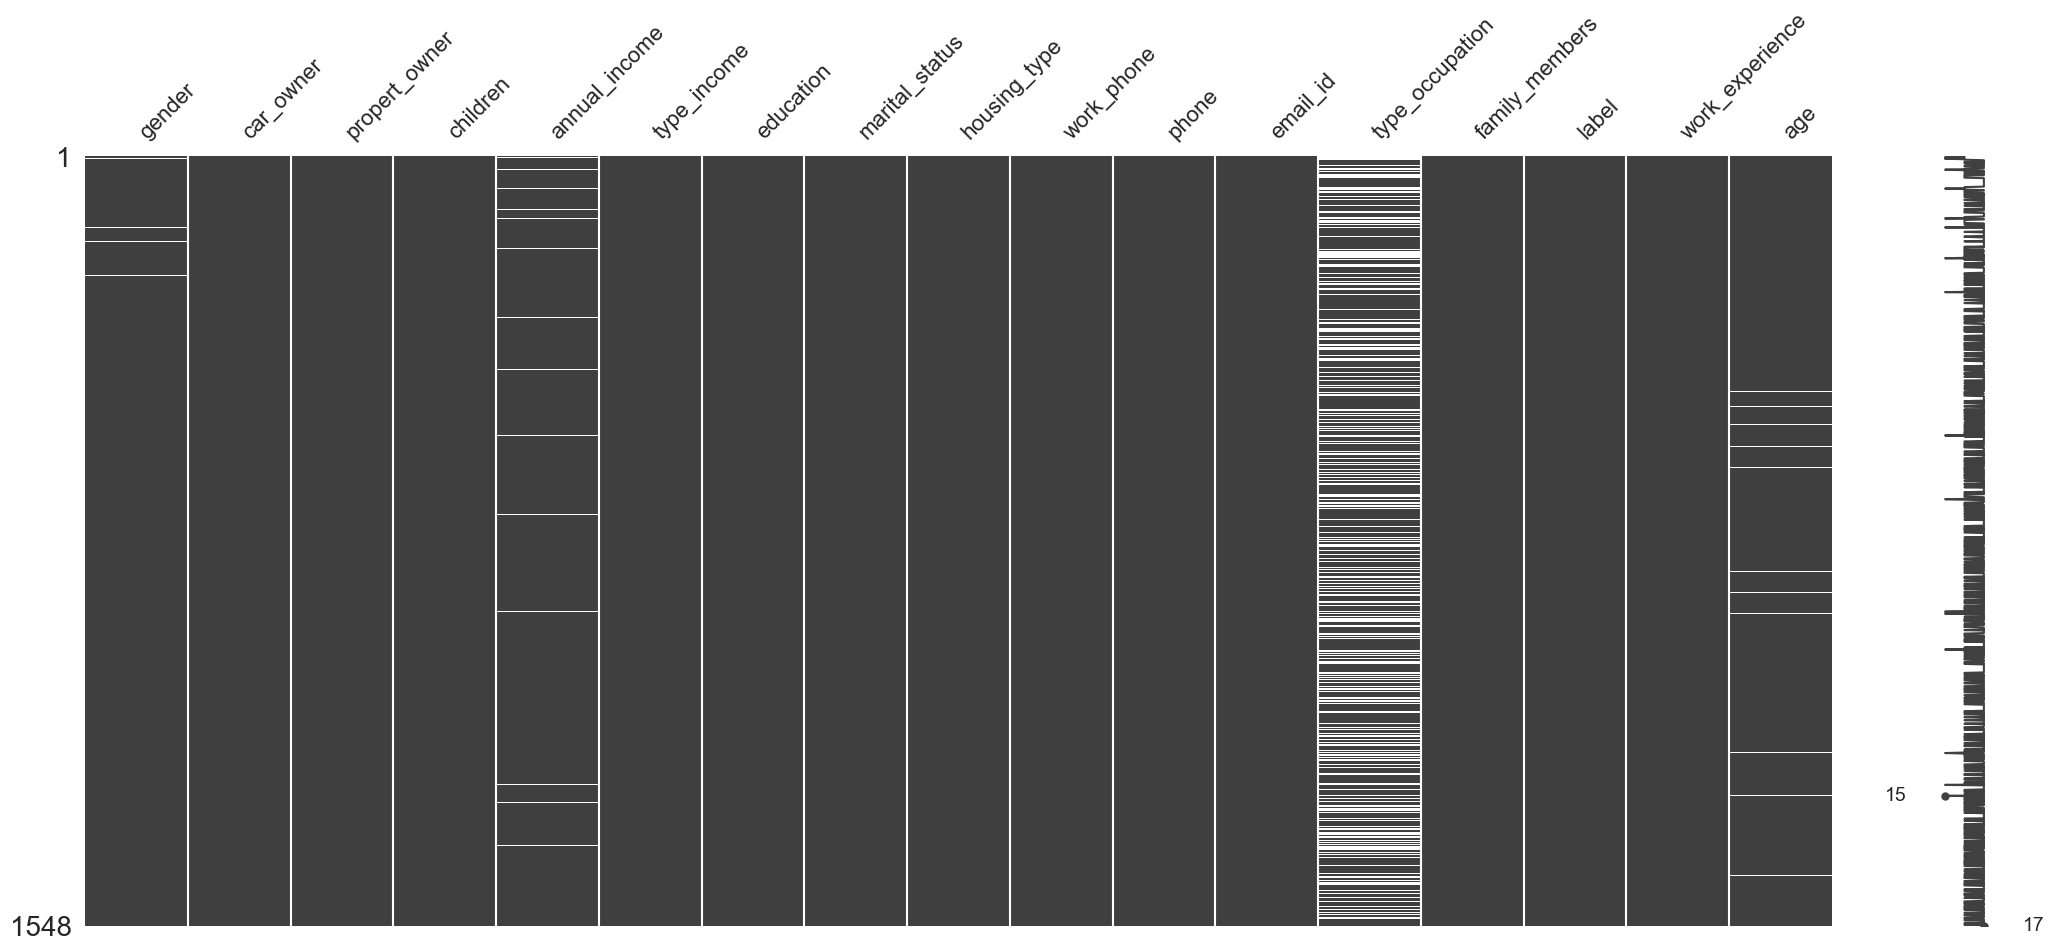

In [49]:
# Shows the location of missing values

import missingno as msno

msno.matrix(df1)

In [50]:
# Deleting the column having max null values
df1.drop(columns = 'type_occupation', inplace = True)

In [51]:
# Imputaion 
# Imputing gender column with Most frequent Categories
df1['gender'].fillna(df1['gender'].mode()[0], inplace = True)

In [52]:
# Imputing annual_income column with its median value
df1['annual_income'].fillna(round(df1['annual_income'].median()),inplace = True)

In [53]:
# Imputing age column with its mean
df1['age'].fillna(round(df1['age'].mean()), inplace = True)

In [54]:
df1.isnull().sum()

gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
work_phone         0
phone              0
email_id           0
family_members     0
label              0
work_experience    0
age                0
dtype: int64

In [55]:
# cleaned data and exporting to the csv file
credit_card_cleaned=df1.to_csv('credit_card_cleaned.csv',index=True)

In [56]:
# Assigning order of education for encoding
edu_category = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']

In [57]:
# Storing encoding classes to objects
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
oe=OrdinalEncoder()

In [58]:
df1['education']=oe.fit_transform(df1[['education']])

In [59]:
df1.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,label,work_experience,age
ind_id,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,1.0,Married,House / apartment,0,0,0,2,1,-0.0,52.0
5009744,F,Y,N,0,315000.0,Commercial associate,1.0,Married,House / apartment,1,1,0,2,1,2.0,38.0
5009746,F,Y,N,0,315000.0,Commercial associate,1.0,Married,House / apartment,1,1,0,2,1,2.0,44.0
5009749,F,Y,N,0,166500.0,Commercial associate,1.0,Married,House / apartment,1,1,0,2,1,2.0,38.0
5009752,F,Y,N,0,315000.0,Commercial associate,1.0,Married,House / apartment,1,1,0,2,1,2.0,38.0


In [60]:
# Storing columns for label encoding in a list
cols = ['type_income','marital_status','housing_type','gender','car_owner','propert_owner']

# Transforming and modifying the variables in training set
for i in cols:
    df1[i] = le.fit_transform(df1[i])

In [61]:
df1.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,label,work_experience,age
ind_id,,,,,,,,,,,,,,,,
5008827,1,1,1,0,180000.0,1,1.0,1,1,0,0,0,2,1,-0.0,52.0
5009744,0,1,0,0,315000.0,0,1.0,1,1,1,1,0,2,1,2.0,38.0
5009746,0,1,0,0,315000.0,0,1.0,1,1,1,1,0,2,1,2.0,44.0
5009749,0,1,0,0,166500.0,0,1.0,1,1,1,1,0,2,1,2.0,38.0
5009752,0,1,0,0,315000.0,0,1.0,1,1,1,1,0,2,1,2.0,38.0


In [62]:
#Treating the Outliers

As we have imputed the missing values and encoded the categorical data, now we will treat the outliers in the dataset. In the distribution of numerical features, we have seen that annual_income and work_experience have skewed data. So, we need to apply some transformations to make them normally distributed.

There are several transformation techniques like: Log Transformation, Square Root Transformation, Power Transformation, Box-Cox and Yeo-Johnson Transformation, etc. Here, Log transformation is applied to annual_income which has large values, and Square Root transformation is applied to work_experience because it has smaller values, so log transformation will make values even more smaller.

In [63]:
# Log transformation on training set
df1['annual_income'] = np.log(df1['annual_income'])

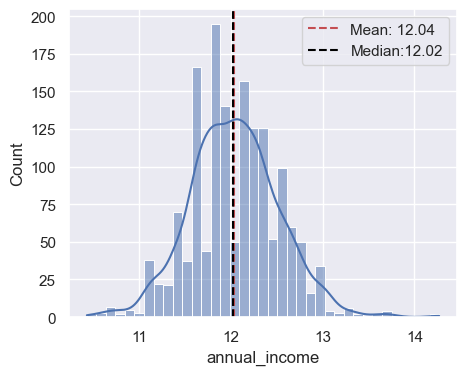

In [64]:
# Visualizing the distribution after transformation of data
sns.histplot(x = df1['annual_income'], kde = True)
plt.axvline(x= df1['annual_income'].mean(), c='r', ls= '--', label = f"Mean: {round(df1['annual_income'].mean(),2)}")
plt.axvline(x= df1['annual_income'].median(), c='black', ls= '--', label = f"Median:{round(df1['annual_income'].median(),2)}")
plt.legend()
plt.show()

In [65]:
df1['annual_income'].skew()

0.20435042715410795

In [66]:
# Square Root Transformation
df1['work_experience'] = np.sqrt(df1['work_experience'])

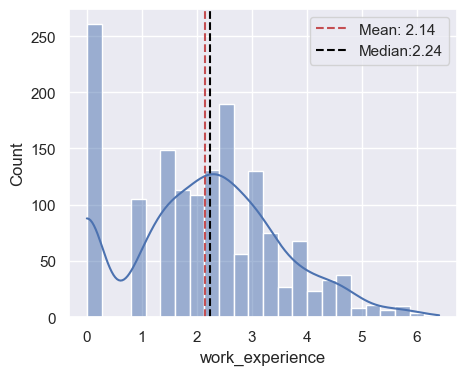

In [67]:
# Visualizing the distribution after transformation of data
sns.histplot(x = df1['work_experience'], kde = True)
plt.axvline(x= df1['work_experience'].mean(), c='r', ls= '--', label = f"Mean: {round(df1['work_experience'].mean(),2)}")
plt.axvline(x= df1['work_experience'].median(), c='black', ls= '--', label = f"Median:{round(df1['work_experience'].median(),2)}")
plt.legend()
plt.show()

In [68]:
df1['work_experience'].skew()

0.15720267100669824

Handling Imbalance with Data Resampling Techniques

Resampling can help to improve model performance in cases of imbalanced data sets. It creates new samples by selecting data points randomly from the original dataset, and these new samples can be used to estimate the population characteristics of the data or to test the performance of a machine learning model.

There are several techniques of data resampling, which can be broadly classified into two categories:


Undersampling: This involves reducing the number of samples in the majority class to balance the class distribution with the minority class. Drawback of this technique is that it can result in loss of useful information.


Oversampling: This involves increasing the number of samples in the minority class to balance the class distribution with the majority class. This technique may lead to overfitting.

SMOTE (Synthetic Minority Over Sampling)
SMOTE is a commonly used oversampling technique.

SMOTE works by creating synthetic samples of the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the K-Nearest Neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In this project, we're going to balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike Random Over Sampling, SMOTE does not create exact copies of observations, but creates new, synthetic samples that are quite similar to the existing observations in the minority class.

In [69]:
y=df1['label']

In [70]:
x=df1.drop('label',axis=1)

In [71]:
from imblearn.over_sampling import SMOTE
# Defining Resampling method
smote = SMOTE(random_state =0, k_neighbors = 3)

# Fitting and resampling training data values
x_r,y_r = smote.fit_resample(x,y)

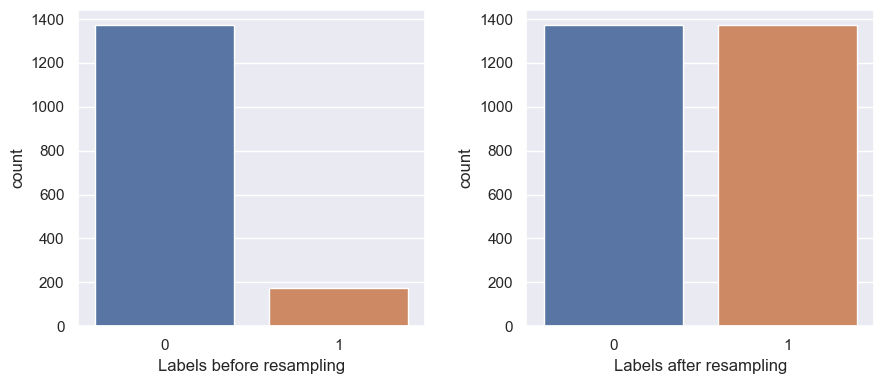

In [72]:
# Visualizing the change in target values for each category

plt.figure(figsize = (9,4))       # Setting the figure size
plt.subplot(121)
sns.countplot(x = y)
plt.xlabel("Labels before resampling")

plt.subplot(122)
sns.countplot(x = y_r.astype('category'))
plt.xlabel("Labels after resampling")

plt.tight_layout(w_pad = 2)
plt.show()

Feature Scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.It is required because many machine learning algorithms are sensitive to the scale of the input features. If the input features have different scales, then some features may dominate the others, and the algorithm may fail to find the optimal solution. Feature scaling ensures that all features contribute equally to the algorithm's decision-making process, and it can improve the accuracy and speed of the machine learning algorithm.

Out of multiple feature scaling techniques, the two most frequently used techniques are:

Normalization or Min-Max Scaling: It is the process of scaling numerical data to a range of values between 0 and 1. The new point is calculated as:

Standardization: It transforms data into a standard normal distribution with a mean of 0 and a standard deviation of 1. The scaled value ranges from -3 to +3.

In [73]:
# Initializing StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [74]:
# Storing Numerical columns needed to be scaled in a list
cols =['annual_income', 'age', 'work_experience']

In [75]:
# Replacing original values with scaled values in training set
x_r[cols] = pd.DataFrame(scale.fit_transform(x_r[cols]), 
                             columns = cols, index = x_r.index)

In [76]:
x_r.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,1,1,1,0,0.129866,1,1.0,1,1,0,0,0,2,-1.487613,0.584233
1,0,1,0,0,1.353737,0,1.0,1,1,1,1,0,2,-0.410347,-0.618947
2,0,1,0,0,1.353737,0,1.0,1,1,1,1,0,2,-0.410347,-0.103299
3,0,1,0,0,-0.040635,0,1.0,1,1,1,1,0,2,-0.410347,-0.618947
4,0,1,0,0,1.353737,0,1.0,1,1,1,1,0,2,-0.410347,-0.618947


In [77]:
x_r.isnull().sum()

gender               0
car_owner            0
propert_owner        0
children             0
annual_income        0
type_income          0
education            0
marital_status       0
housing_type         0
work_phone         211
phone              277
email_id           166
family_members       0
work_experience      0
age                  0
dtype: int64

In [78]:
x_r['work_phone'].fillna(x_r['work_phone'].mode()[0],inplace=True)

In [79]:
x_r['phone'].fillna(x_r['phone'].mode()[0],inplace=True)

In [80]:
x_r['email_id'].fillna(x_r['email_id'].mode()[0],inplace=True)

Model Building and Performance Evaluation
Now, as we have done the required data preprocessing, let's proceed further to building Machine Learning models. In this project, several machine learning models are build using different classification algorithms and performance is optimized by performing Hyperparameter Tuning. The results obtained from each algorithm are then summarized.

In [81]:
# splitting the Data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_r,y_r,test_size=0.2,random_state=10,)

In [82]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [83]:
model.score(x_test,y_test)

0.6472727272727272

In [84]:
y_pred=model.predict(x_test)

In [85]:
# Accuracy score for test data
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
print("Accuracy Score for LogisticRegression:",accuracy_score(y_test, y_pred))

Accuracy Score for LogisticRegression: 0.6472727272727272


In [86]:
# Classification report to evaluate different performance metrics
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       271
           1       0.65      0.67      0.66       279

    accuracy                           0.65       550
   macro avg       0.65      0.65      0.65       550
weighted avg       0.65      0.65      0.65       550



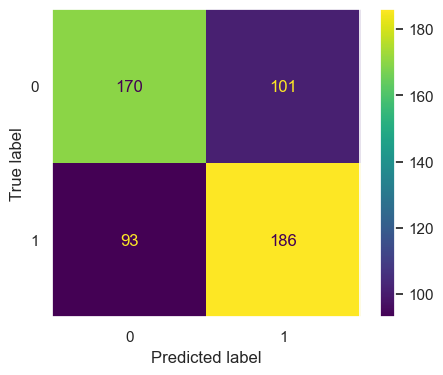

In [87]:
# Confusion Matrix for overview of incorrect predictions
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.grid()
plt.show()

In [88]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [89]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C'  :[0.1,1,5,10,100],
            'kernel':['rbf','linear','sigmoid'],
        
            
        }
    },
    'RF':{
        'model':RandomForestClassifier(),
        'params':{
             'n_estimators' : [5,10,15,20,30,40,50],
                  'criterion': ['gini', 'entropy'], 
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression( multi_class='auto'),
        'params': {
            'C': [0.1,1,5,10,100],
            'solver':['liblinear',  'newton-cg']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy','log_loss'],
            'max_depth': [None, 5, 10, 15, 20, 30, 50],
            
            
        }
    }     
}
            

In [90]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'Accuracy'   : clf.score(x_test,y_test)
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params','Accuracy'])
df

,model,best_score,best_params,Accuracy
0,svm,0.876152,"{'C': 100, 'kernel': 'rbf'}",0.892727
1,RF,0.933975,"{'criterion': 'gini', 'n_estimators': 50}",0.945455
2,logistic_regression,0.638444,"{'C': 10, 'solver': 'newton-cg'}",0.649091
3,decision_tree,0.872510,"{'criterion': 'entropy', 'max_depth': None}",0.880000


In [91]:
model1=RandomForestClassifier(n_estimators=40)

In [92]:
model1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [93]:
model1.score(x_test,y_test)

0.9509090909090909

In [94]:
y_pred1=model1.predict(x_test)

In [95]:
# Accuracy score for test data
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
print("Accuracy Score for RandomForestClassifier:",accuracy_score(y_test, y_pred1))

Accuracy Score for RandomForestClassifier: 0.9509090909090909


In [96]:
# Classification report to evaluate different performance metrics
print("Classification Report:\n",classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       271
           1       0.95      0.95      0.95       279

    accuracy                           0.95       550
   macro avg       0.95      0.95      0.95       550
weighted avg       0.95      0.95      0.95       550



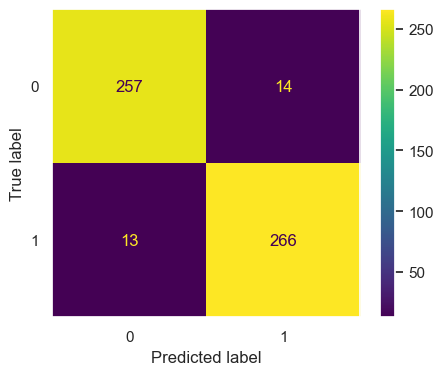

In [97]:
# Confusion Matrix for overview of incorrect predictions
cm1 = confusion_matrix(y_test, y_pred1, labels= model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model1.classes_)
disp.plot()
plt.grid()
plt.show()

In [98]:
# Summarizing the results

In [99]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params','Accuracy'])
df

,model,best_score,best_params,Accuracy
0,svm,0.876152,"{'C': 100, 'kernel': 'rbf'}",0.892727
1,RF,0.933975,"{'criterion': 'gini', 'n_estimators': 50}",0.945455
2,logistic_regression,0.638444,"{'C': 10, 'solver': 'newton-cg'}",0.649091
3,decision_tree,0.872510,"{'criterion': 'entropy', 'max_depth': None}",0.880000


In [100]:
# RandomForest is the best fit model.